In [110]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio

import test_objective as TO
import test_subjective as TS
from utils.wav_utils import read_wav

## Pruebas objetivas


En esta sección se busca analizar como varia el algorítmo antes distintos casos de interes y bajo distintos parámetros. COmo el procedimiento de TSM con phase vocoder necesita de estimar la frecuencia instantánea, se necesita de tamaños de ventana realtivamente alto para que la resolución frecuencial sea la adecuada. En los diccionarios se deja constancia de los distintos tipos de configuración probadas bajo estos test.

In [111]:
fs = 22050
alpha = 1.4
cfg1 = {"N": 8192, "Hs": 8192//4, "alpha": alpha, "fs": 22050}
cfg2 = {"N": 8192, "Hs": 8192//2, "alpha": alpha, "fs": 22050}
cfg3 = {"N": 4096, "Hs": 4096//2, "alpha": alpha, "fs": 22050}
cfg4 = {"N": 4096, "Hs": 4096//4, "alpha": alpha, "fs": 22050}
cfg5 = {"N": 4096, "Hs": 4096//8, "alpha": alpha, "fs": 22050}
cfg6 = {"N": 2048, "Hs": 2048//4, "alpha": alpha, "fs": 22050}
cfg7 = {"N": 1024, "Hs": 1024//4, "alpha": alpha, "fs": 22050}
cfg8 = {"N": 512, "Hs": 512//4, "alpha": alpha, "fs": 22050}
cfg_ola = {"N": 1024, "Hs": 1024//2, "alpha": alpha}

El primer test compara señales ideales respeto a un caso base de interes particular para cada algorítmo. En el primer test se usará una señal senoidal. Primero se muestra un ejemplo con una frequencia arbitraria y luego se realiza el mismo analisis para cada frequencia.

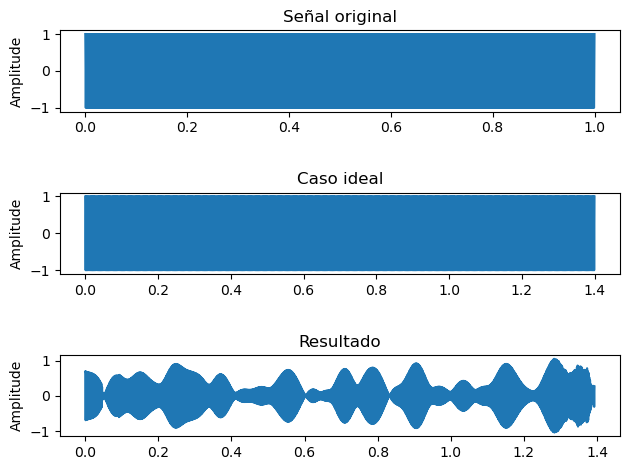

In [112]:
f_analysis = 500
config = cfg4
algorithm = "PV"
x_base, x_ideal, x_result = TO.test_ideal_signal(algo=algorithm, f0=f_analysis, fs=fs, config=config, 
                                                 plot=True, audio_save=False, return_audios=True)

In [113]:
Audio(x_ideal, rate=fs)

In [114]:
Audio(x_result, rate=fs)

Valor final promedio 0.6731254249720773


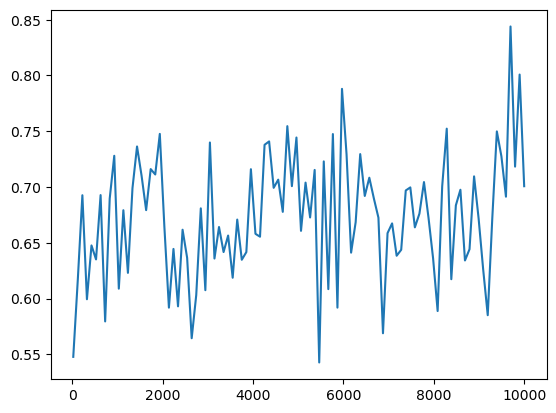

In [115]:
res = 100
freqs = np.linspace(20,10000, res)  #Frecuencias a analizar

sim_value = []
gain_dif_value = []

for f in freqs:
    sim, gain = TO.test_ideal_signal(algo=algorithm, f0=f, fs=fs, config=config, plot=False, audio_save=False, return_audios=False)
    sim_value.append(sim)
    gain_dif_value.append(gain)

plt.plot(freqs, sim_value)
print("Valor final promedio", np.sum(sim_value)/res)

In [116]:
print("Freq de mayor similitud: ", freqs[np.argmin(sim_value)])
print("Freq de menor similitud: ", freqs[np.argmax(sim_value)])

Freq de mayor similitud:  5463.636363636363
Freq de menor similitud:  9697.575757575756


Gain value prom:  0.07001612659524344


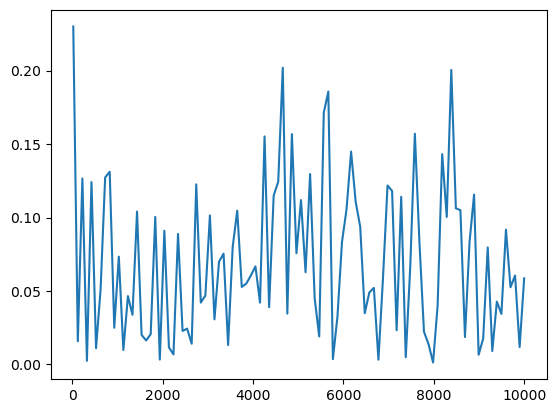

In [117]:
plt.plot(freqs, gain_dif_value)
print("Gain value prom: ", np.sum(gain_dif_value)/res)

A continuación, se hará una test con una señal que fluctua rapidamente en frecuencia. 

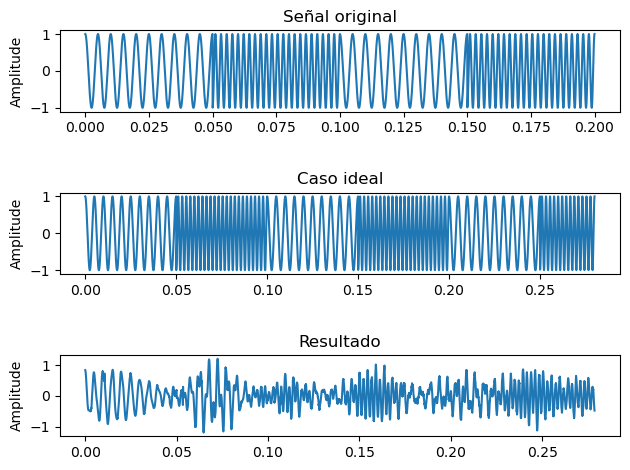

In [118]:
x_base, x_ideal, x_result = TO.test_freq_change_signal(algo=algorithm, fs=fs, config=config, 
                                                       plot=True, audio_save=False, return_audios=True)

In [119]:
Audio(x_ideal, rate=fs)

In [120]:
Audio(x_result, rate=fs)

In [121]:
rta = TO.test_freq_change_signal(algo=algorithm, fs=fs, config=config, plot=False, audio_save=False, return_audios=False )
print("Diferencia respecto al ideal: ", rta[0])
print("Diferencia en ganancia: ", rta[1])

Diferencia respecto al ideal:  0.6548994963096507
Diferencia en ganancia:  0.20426710580996543


## Pruebas Subjetivas

En esta sección se evaluarán, diferentes configuraciones del algorítmo aplicadas a una señal real. 

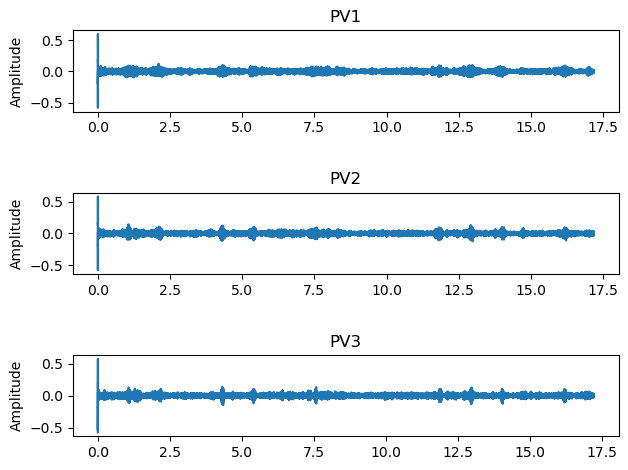

In [122]:
path_audio = "..\\audios\\synth.wav"
#En el config del HPS tenes que poner una lista con las configs de PV, OLA y HPS
#cfg_hps_solo = {"N":1024, "M": 17}
#cfg_hps = [cfg_ola, cfg3, cfg_hps_solo]
#test = [["OLA", cfg_ola, "OLA TSM"], ["PV", cfg3, "PV TSM"], ["HPS", cfg_hps, "HPS TSM"]]
test = [["PV", cfg1, "PV1"], ["PV", cfg4, "PV2"],["PV", cfg6, "PV3"]]

x1, x2, x3 = TS.compare_algorithms(path_audio, test, plot=True, save_audios=False, return_audios=True)

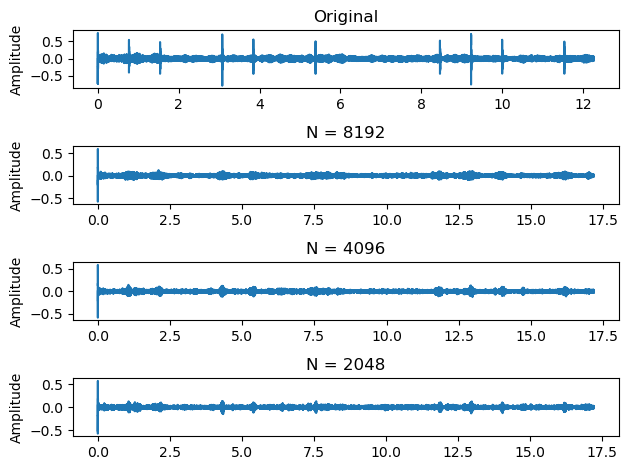

In [123]:
from test.plotting import compare_results

x_b, _ = read_wav(path_audio, fs, mono=True)
titles = ["Original", "N = 8192", "N = 4096", "N = 2048"]
compare_results(fs, titles, x_b, x1, x2, x3)

In [124]:
#Señal original
fs = 22050
original_audio, _ = read_wav(path_audio, fs, mono=True)

Audio(original_audio, rate=fs)

In [125]:
#Una de las señales modificadas (En este caso HPS)
#Es como si se duplican los golpes impulsivos pero el tema del reverb y la calidad en general mejora bastante
Audio(x3, rate=fs)

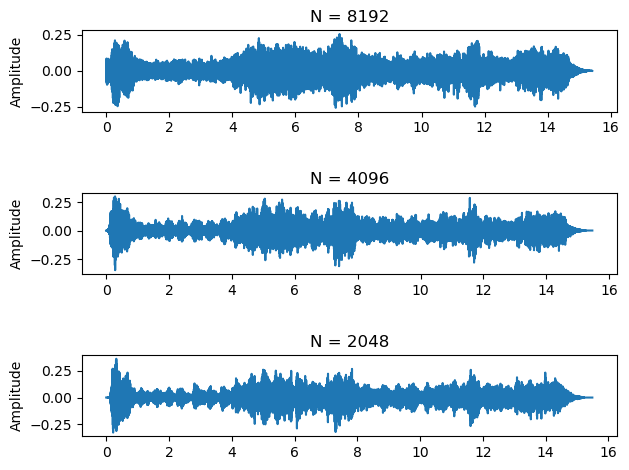

In [126]:
path_audio = "..\\audios\\fast_chopin.wav"
#En el config del HPS tenes que poner una lista con las configs de PV, OLA y HPS
#cfg_hps_solo = {"N":1024, "M": 17}
#cfg_hps = [cfg_ola, cfg3, cfg_hps_solo]
#test = [["OLA", cfg_ola, "OLA TSM"], ["PV", cfg3, "PV TSM"], ["HPS", cfg_hps, "HPS TSM"]]
test = [["PV", cfg1, "N = 8192"], ["PV", cfg4, "N = 4096"],["PV", cfg6, "N = 2048"]]

x1, x2, x3 = TS.compare_algorithms(path_audio, test, plot=True, save_audios=False, return_audios=True)

In [127]:
#Señal original
fs = 22050
original_audio, _ = read_wav(path_audio, fs, mono=True)

Audio(original_audio, rate=fs)

In [128]:
Audio(x1, rate=fs)

In [129]:
Audio(x2, rate=fs)

In [130]:
Audio(x3, rate=fs)

In [131]:
path_audio = "..\\audios\\sharp_bells.wav"
#En el config del HPS tenes que poner una lista con las configs de PV, OLA y HPS
#cfg_hps_solo = {"N":1024, "M": 17}
#cfg_hps = [cfg_ola, cfg3, cfg_hps_solo]
#test = [["OLA", cfg_ola, "OLA TSM"], ["PV", cfg3, "PV TSM"], ["HPS", cfg_hps, "HPS TSM"]]
test = [["PV", cfg1, "PV1"], ["PV", cfg4, "PV2"],["PV", cfg6, "PV3"]]

x1, x2, x3 = TS.compare_algorithms(path_audio, test, plot=False, save_audios=False, return_audios=True)

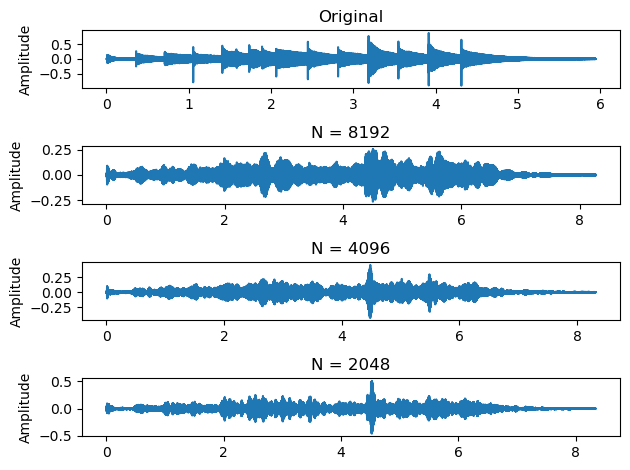

In [132]:
x_b, _ = read_wav(path_audio, fs, mono=True)
titles = ["Original", "N = 8192", "N = 4096", "N = 2048"]
compare_results(fs, titles, x_b, x1, x2, x3)

In [133]:
#Señal original
fs = 22050
original_audio, _ = read_wav(path_audio, fs, mono=True)

Audio(original_audio, rate=fs)

In [134]:
Audio(x1, rate=fs)

In [135]:
Audio(x2, rate=fs)

In [136]:
Audio(x3, rate=fs)